## Imports

In [10]:
import numpy as np
from collections import Counter
from scipy.special import comb
from scipy.stats import bernoulli

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

import seaborn as sns
sns.set(font_scale=1.5)

## Notes:

- Definition of **conditional probability** (for finite sample space) is the proportion of time $A\cap B$ occurs divided by the proportion of time $B$ occurs:

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{N_{A\cap B}}{N_B} \\
               &= \frac{\big(\frac{N_{A\cap B}}{N_S}\big)}{\big(\frac{N_B}{N_S}\big)} \\
               &\approx \frac{P[A\cap B]}{P[B]} \\
               &\geq 0
    \end{split}
\end{equation}
$$

Note: we must assume the **marginal probability** satisfies $P[B] \neq 0$. Also, the event $B$ comprises a new sample space, denoted as the **reduced sample space**.

***
-  If $A$ and $C$ are mutually exclusive events, then

$$
P[A\cup C|B] = P[A|B] + P[C|B]
$$

***
- The **Law of Total Probability** states that for a partition of the sample space $S = \bigcup_{i=1}^{N}B_i$ such that $B_i\cap B_j = \emptyset$ for $i\neq j$ we have

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A\cap B_i]} \\
             &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]}
    \end{split}
\end{equation}
$$

***
- **Statistically Independent** events are characterized by $P[A\cap B] = P[A]P[B]$

***
- **Bayes Theorem** states that 

$$
\begin{equation}
    \begin{split}
        P[B|A] &= \frac{P[A|B]P[B]}{P[A]} \\
               &= \frac{P[A|B]P[B]}{P[A|B]P[B] + P[A|B^c]P[B^c]}
    \end{split}
\end{equation}
$$

where $P[B|A]$ is called the **posterior probability** and $P[B]$ is called the **prior probability**. Moreover, if a set of $B_i$s partition the sample space, then Baye's Theorem can be stated as

$$
P[B_k|A] = \frac{P[A|B_k]P[B_k]}{ \sum_{i=1}^{N}{P[A|B_i]P[B_i]} }
$$

where $k=1,2,\dots, N$ and the denominator serves to normalize the posterior probability so that the conditional probabilities, $P[B_k|A]$, sum to one.

***
- The **Binomial Probability Law** describes the probability of $k$ successes in $M$ independent Bernoulli trials:

$$
P[k] = {M\choose k}p^k(1-p)^{M-k}
$$

***
- The **Geometric Probability Law** describes the probability of the first success at trial $k$ if $M=k-1$ independent Bernoulli trials have been carried out

$$
P[k] = p(1-p)^{k-1}
$$

***
- The **Multinomial Probability Law** describes the probability of obtaining $k_1$ $s_1$'s, $k_2$ $s_2$'s, $\dots$, and $k_N$ $s_N$'s from a sample space $S=\{s_1, s_2, \dots, s_N\}$ where $M$ independent Bernoulli trials were performed with $N$ possible outcomes for each trial:
<br></br><br></br>
$$
P[k_1,k_2,\dots,k_N] =  {M \choose {k_1,k_2,\dots,k_N}} p_1^{k_1} p_2^{k_2} \dots p_N^{k_N}
$$
<br></br>
where ${M \choose {k_1,k_2,\dots,k_N}} = \frac{M!}{k_1!k_2!\dots k_N!}$ and $k_1 + k_2 + \dots + k_N = M$.

***
- **Non-Independent Subexperiments** require the probability to be found using the probability chain rule:

$$
P[A] = P[A_{M}|A_{M-1},\dots,A_2,A_1]P[A_{M-1}|A_{M-2},\dots,A_2,A_1]\cdots P[A_2|A_1]P[A_1].
$$

If the probabilities for trial $i$ depend only on the outcome of the previous trial (i.e. it has a memory of $i-1$) then the sequence is called a **Markov sequence**. We can then reexpress the probability above as

$$
\begin{equation}
    \begin{split}
        P[A] &=  P[A_{M}|A_{M-1}]P[A_{M-1}|A_{M-2}]\cdots P[A_2|A_1]P[A_1] \\
             \\
             &= P[A_1]\prod_{i=2}^{M}{P[A_i|A_{i-1}]}
    \end{split}
\end{equation}
$$

where the following are called the **state transition probabilities**

$$
P[A_{i}|A_{i-1},\dots,A_2,A_1] = P[A_i|A_{i-1}].
$$

***
- Anywhere this picture occurs indicates a problem I need to check or finish:


![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

## Problems

### Key:

- __(w)__ indicates a __word__ problem
- __(f)__ indicates a __formula__ problem
- __(c)__ indicates a __computer__ problem
- __(t)__ indicates a __theoretical__ problem
- 😃 indicates the answer is available in the back

### 4.1 (f)

If $B\subset A$, what is $P[A|B]$? Explain your answer.

#### Answer:

If $B\subset A$ then we see that $A\cap B = B$, so the conditional probability must be

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{P[ B]}{P[B]} \\
               \\
               &= 1.
    \end{split}
\end{equation}
$$

***
### 4.2 😃(f)

A point $x$ is chosen at random with within the interval $(0,1)$. If it is known that $x \geq \frac{1}{2}$, what is the probability that $x \geq \frac{7}{8}?$

#### Answer:

Let $B=\{ x\geq \frac{1}{2}\}$ and $A=\{ x \geq \frac{7}{8}\}$, where we will also assume uniform probabilities in $(0,1)$. Then $A\cap B = \{ x\in[\frac{1}{2}, 1)\cap [\frac{7}{8}, 1)\} = \{x\in[\frac{7}{8},1)\}$, which is just $A$. So the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{P[A]}{P[B]} \\
               \\
               &= \frac{ \bigg( \frac{1 - \frac{7}{8}}{1-0}\bigg)}{ \bigg( \frac{1 - \frac{1}{2}}{1-0}\bigg)} \\
               \\
               &= \frac{1}{4}
    \end{split}
\end{equation}
$$

****
### 4.3 (w)

A coin is tossed three times with each 3-tuple outcome being equally likely. Find the probability of obtaining $(H,T,H)$ if it is known that the outcome has $2$ heads. Do this by 
1. using the idea of a reduced sample space and 
2. using the definition of conditional probability

#### Answer:

Let $B=\{$ There are two heads $\} = \{(H,T,H),(T,H,H),(H,H,T)\}$ and $A=\{(H,T,H)\}$, where the sample space is 

$$
\begin{equation}
    \begin{split}
        S = \{&(H,H,H),(H,H,T),(H,T,H), \\
              &(T,H,H),(T,T,H),(T,H,T), \\
              &(H,T,T),(T,T,T)\}.
    \end{split}
\end{equation}
$$

We can check if the number of elements is correct by noticing that $N_S = {2\choose 1}^3 = 8$. Then $A\cap B = \{ (H,T,H) \}$, which is just $A$. So the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{P[A]}{P[B]} \\
               \\
               &= \frac{ \big(\frac{1}{8} \big)}{ \big(\frac{3}{8} \big)} \\
               \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

Alternatively we could use the notion of reduced sample space to solve the problem:

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{N_{A\cap B}}{N_B} \\
               \\
               &= \frac{ \big| \{(H,T,H)\} \big|}{ \big| \{(H,T,H),(T,H,H),(H,H,T)\} \big|} \\
               \\
               &= \frac{1}{3}
    \end{split}
\end{equation}
$$

since there are only three events that contain two heads in the sample space.

***
### 4.4 (w)

Two dice are tossed. Each 2-tuple outcome is equally likely. Find the probability that the number that comes up on die 1 is the same as the number that comes up on die 2 if it is known that the sum of these numbers is even.

#### Answer:

Let $B=\{ D_1+D_2$ is even$ \}$ and $A=\{$ the number on $D_1$ is the same as on $D_2\}$. The sample space is 

$D_i$    |  1  |  2  |  3  |  4  |  5  |  6 
---------|-----|-----|-----|-----|-----|-----
**1**    |**<span style="color:blue">(1,1)</span>**|(1,2)|<span style="color:blue">(1,3)</span>|(1,4)|<span style="color:blue">(1,5)</span>|(1,6)
**2**    |(2,1)|**<span style="color:blue">(2,2)</span>**|(2,3)|<span style="color:blue">(2,4)</span>|(2,5)|<span style="color:blue">(2,6)</span>
**3**    |<span style="color:blue">(3,1)</span>|(3,2)|**<span style="color:blue">(3,3)</span>**|(3,4)|<span style="color:blue">(3,5)</span>|(3,6)
**4**    |(4,1)|<span style="color:blue">(4,2)</span>|(4,3)|**<span style="color:blue">(4,4)</span>**|(4,5)|<span style="color:blue">(4,6)</span>
**5**    |<span style="color:blue">(5,1)</span>|(5,2)|<span style="color:blue">(5,3)</span>|(5,4)|**<span style="color:blue">(5,5)</span>**|(5,6)
**6**    |(6,1)|<span style="color:blue">(6,2)</span>|(6,3)|<span style="color:blue">(6,4)</span>|(6,5)|**<span style="color:blue">(6,6)</span>**

where <span style="color:blue">blue</span> colored entries depict outcomes in $B$ and **<span style="color:blue">bold blue</span>** depict outcomes in $A$. Note that $A\subset B$. Then the reduced sample space is given by $N_B=18$ while $N_{A\cap B}=6$ so the conditional probability is

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{6}{ 18 } \\
               \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

Alternatively, we could calculate the probability directly from the definition:

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{ \big(\frac{6}{36} \big)}{ \big(\frac{18}{36} \big)} \\
               \\
               &= \frac{1}{3}.
    \end{split}
\end{equation}
$$

***
### 4.5 😃(f)

An urn contains $3$ red balls and $2$ black balls. If two balls are chosen without replacement, find the probability that the second ball is black if it is known that the first ball chosen is black.

#### Answer:

Intuitively, $P[A|B] = \frac{1}{4}$ because there is one black ball left to choose from out of the four remaining balls (this is the idea of the reduced sample space).

Alternatively, let $B = \{1^{st}$ball is black$\}$ and $A = \{2^{nd}$ball is black$\}$. We are given an urn with five balls: $R_1,R_2,R_3,B_1,B_2$. The sample space is given by 

$$
\begin{equation}
    \begin{split}
        S = \{&(R_1,R_2),(R_1,R_3),(R_2,R_3),(B_1,B_2),(R_1,B_1) \\
              &(R_2,B_1),(R_3,B_1),(R_1,B_2),(R_2,B_2),(R_3,B_2) \\
              &(R_2,R_1),(R_3,R_1),(R_3,R_2),(B_2,B_1),(B_1,R_1) \\
              &(B_1,R_2),(B_1,R_3),(B_2,R_1),(B_2,R_2),(B_2,R_3)\}
    \end{split}
\end{equation}
$$

where $N_S = 20$. Next, notice that $A\cap B = \{(B_1,B_2),(B_2,B_1)\}$ so $N_{A\cap B}=2$ and $P[A\cap B] = \frac{2}{20}$. To find $P[B]$ we count the outcomes from the sample space for which the $1^{st}$ ball is black, $N_{ B}=8$, so $P[B] = \frac{8}{20}$. Alternatively, we could just notice that there are $N_B = {2 \choose 1}$ ways to pick the first black ball out of ${5 \choose 1}$ choices for the $1^{st}$ ball so $P[B] = \frac{{2 \choose 1}}{{5 \choose 1}}= \frac{2}{5}$. Hence, the conditional probability is given by 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{ \big(\frac{2}{20} \big)}{ \big(\frac{8}{20} \big)} \\
               \\
               &= \frac{1}{4}.
    \end{split}
\end{equation}
$$

***
### 4.6 (f)

A coin is tossed $11$ times in succession. Each 11-tuple outcome is equally likely to occur. If the first $10$ tosses produced all heads, what is the probability that the $11^{th}$ toss will also be a head?

#### Answer:

Each coin toss subexperiment is an independent event that is not influenced by any prior coin tosses. We can represent each outcome as an $11-$tuple $(d_1,d_2,\dots,d_{11})$ where each $d_i\in\{H,T\}$. If we let $B = \{10$ Heads in a row $\}$ and $A = \{$ the next toss is Heads $\}$ then 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{P[A]P[B]}{P[B]} \\
               \\
               &= P[A]\\
               \\
               &= \frac{1}{2}.
    \end{split}
\end{equation}
$$

Alternatively, we could notice that there are only two options for the $11^{th}$ outcome: $\{(H,H,\dots,H,H),(H,H,\dots,H,T)\}$. Thus, the reduced sample space is $N_B = 2$ while $N_{A\cap B} = 1$. This is different from the related problem of finding the probability of getting 11 heads in a row, which is given by the Binomial probability law:

$$
\begin{equation}
    \begin{split}
        P[(H,H,\dots,H)_{1\times 11}] &= {M \choose k}p^{k}(1-p)^{M-k} \\
                                      \\
                                      &= {11 \choose 11}p^{11}(1-p)^{11-11} \\
                                      \\
                                      &= \frac{1}{p^{11}}.
    \end{split}
\end{equation}
$$

***
### 4.7 😃(w)

Using Table 4.1, determine the probability that a college student will have a weight greater than $190$ lbs if he/she has a height exceeding $5'8"$. Next, find the probability that a student's weight will exceed $190$ lbs.

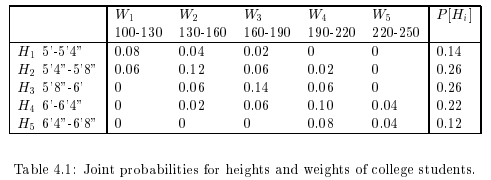

#### Answer:

Let $B = \{h \geq 5\text{ ft } 8\text{ in }\}$ and $A = \{w \geq 190lbs\}$. Note that we **cannot** simply count the corresponding number of outcomes in each event and divide by the total outcomes because the probabilities are **not equally likely**. Consequently, we need to consult the table provided for each individual probability. $P[A\cap B]$ is given by the sum of the **<span style="color:blue"> blue </span>** encircled probabilities in the figure below:

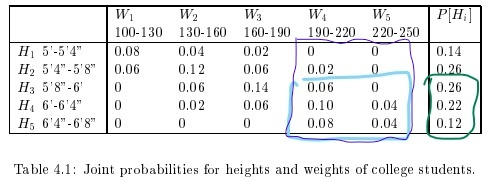

$$
P[A\cap B] = \sum_{i=3}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} = 0.32.
$$

Next, we notice that $B$ is made of the rows $H_3,H_4,H_5$ so the marginal probability is $P[B] = \sum_{k=3}^5{P[H_k]} = 0.6$ (which corresponds to the **<span style="color:green"> green </span>** encircled probabilities). Hence, the conditional probability can be computed as

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{ \sum_{i=3}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} }{ \sum_{k=3}^5{P[H_k]} } \\
               \\
               &= \frac{0.32}{0.6} \\
               \\
               &= 0.5\bar 3.
    \end{split}
\end{equation}               
$$

Finally, we are asked to find $P[A] = \sum_{i=1}^{5}\sum_{j=4}^{5}{P[(H_i,W_j)]} = 0.34$ which corresponds to the **<span style="color:purple"> purple </span>** encircled probabilities.

In [3]:
M = [0.14, 0.26, 0.26, 0.22, 0.12]
J = [0, 0, 0.02, 0, 0.06, 0, 0.1, 0.04, 0.08, 0.04]

Pa_given_b = sum(J[4:]) / sum(M[2:])
Pa = sum(J)

print(Pa_given_b)
print(Pa)

0.5333333333333333
0.33999999999999997


***
### 4.8 (w)

Using Table 4.1, find the probability that a student has a weight less than $160$ lbs if he/she has a height greater than $5'4"$. Also, find the probability that a student's weight is less than $160$ lbs if he/she has height _less_ than $5'4"$. Are these two results related?

#### Answer:

Let $B = \{h \geq 5\text{ ft } 4\text{ in }\}$, $A = \{w \leq 160lbs\}$, and $C = \{h \leq 5\text{ ft } 4\text{ in }\} = B^c$. We're interested in finding $P[A|B]$ and $P[A|B^c]$. Like the last problem we will consult the table for the joint and marginal probabilities. 

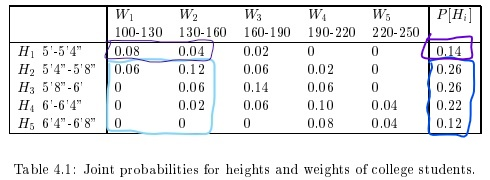


$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{ \sum_{i=2}^{5}\sum_{j=1}^{2}{P[(H_i,W_j)]} }{ \sum_{k=2}^5{P[H_k]} } \\
               \\
               &= \frac{0.06 + 0.12 + 0 + 0.06 + 0 + 0.02 + 0 + 0}{0.26 + 0.26 + 0.22 + 0.12} \\
               \\
               &\approx 0.3.\\
               \\
        P[A|B^c] &= \frac{ \sum_{i=1}^{1}\sum_{j=1}^{2}{P[(H_i,W_j)]} }{ \sum_{k=1}^1{P[H_k]} } \\
                 \\
                 &= \frac{0.08 + 0.04}{0.14} \\
                 \\
                 &\approx 0.86.
    \end{split}
\end{equation}               
$$

In [2]:
J = [0.08, 0.04, 0.06, 0.12, 0, 0.06, 0, 0.02, 0, 0]

Pa_given_b = sum(J[2:]) / sum(M[1:])
Pa_given_bc = sum(J[:2]) / sum(M[:1])

print(Pa_given_b)
print(Pa_given_bc)

0.3023255813953489
0.857142857142857


***
### 4.9 (t)

Prove that the statement $P[A|B] + P[A|B^c]=1$ is false. Use Figure 4.2a to provide a counterexample.

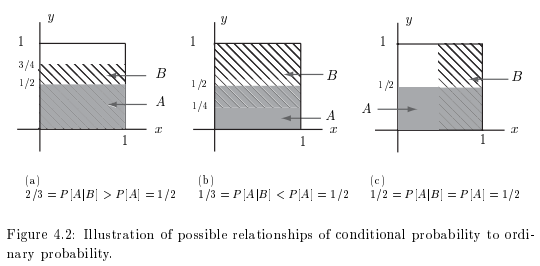

#### Answer:

We'll look to Figure 4.2a for a counterexample.  Notice that $A\cap B = \{x\in[0,1], y\in[0,\frac{1}{2}]\} = A$ and $A\cap B^c = \{\}$ so $P[A\cap B] = \frac{1}{2}$ and $P[A\cap B^c]=0$. Thus,

$$
P[A|B]=\frac{\big( \frac{2}{4} \big)}{\big( \frac{3}{4} \big)} = \frac{2}{3}
$$

and 

$$
P[A|B^c]=\frac{ 0 }{ \frac{3}{4} } = 0
$$

so we see that $1 \neq P[A|B] + P[A|B^c]= \frac{2}{3}$.


***
### 4.10 (t)

Prove that for the events $A,B,C$, which are not necessarily mutually exclusive,

$$
P[A\cup B|C] = P[A|C] + P[B|C] - P[A,B|C]
$$

#### Answer:

$$
\begin{equation}
    \begin{split}
        P[A\cup B|C] &= \frac{P[(A\cup B)\cap C]}{P[C]} \\
                     \\
                     &= \frac{ P[(A\cap B)\cup(B\cap C)] }{P[C]} \\
                     \\
                     &= \frac{ P[A\cap B] + P[B\cap C] - P[(A\cap B)\cap(B\cap C)] }{P[C]} \\
                     \\
                     &= \frac{ P[A\cup B] }{P[C]} + \frac{ P[B\cap C] }{P[C]} - \frac{ P[(A\cap B)\cap C)] }{P[C]} \\
                     \\
                     &= P[A|C] + P[B|C] - P[A,B|C].
    \end{split}
\end{equation}
$$

***
### 4.11 😃(w)

A group of $20$ patients afflicted with a disease agree at be a part of a clinical drug trial. The group is divied up into two groups of $10$ subjects each, with one group given the drug and the other group given sugar water, i.e. this is the control group. The drug is $80\%$ effective in curing the disease. If one is not given the drug, there is still a $20\%$ chance of a cure due to remission. What is the probability that a randomly selected subject will be cured?

#### Answer:

Let $A = \{$ A randomly selected subject will be cured $\}$. We partition the patients $S=B_1\cup B_2$ into two groups $B_1 = \{ $ Control selected $\}$ and $B_2 = \{$ Treated selected$\}$ where each $|B_i|=10$. We are given the fact that $P[A|B_1] = 0.2$ and $P[A|B_2] = 0.8$. Implicitly, we are also given 

$$
\begin{equation}
    \begin{split}
        P[B_i] &= \frac{N_{B_i}}{N_S} \\
               \\
               &= \frac{ {10\choose 1} }{ {20\choose 1} } \\
               \\
               &= \frac{1}{2}
    \end{split}
\end{equation}
$$

since "randomly selecting" here without further explaination means an equal chance at being selected. Thus, by the Law of Total Probability

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]} \\
             \\
             &= {P[A| B_1]P[B_1]} + {P[A| B_2]P[B_2]} \\
             \\
             &= (0.2)(0.5) + (0.8)(0.5) \\
             \\
             &= 0.5
    \end{split}
\end{equation}
$$

***
### 4.12 (w)

A new bus runs on Sunday, Tuesday, Thursday, and Saturday while an older bus runs on the other days. The new bus has a probability of being on time $\frac{2}{3}$ while the older bus has a probability of only $\frac{1}{3}$. If a passenger chooses an arbitrary day of the week to ride the bus, what is the probaiblity that the bus will be on time?

#### Answer:

Let $A = \{$ The bus will be on time $\}$. We partition the buses $S=B_1\cup B_2$ into two groups $B_1 = \{ $ New bus selected $\}$ and $B_2 = \{$ Old bus selected $\}$ where $|B_1|=4$ and $|B_2|=3$. We are given the fact that $P[A|B_1] = \frac{2}{3}$ and $P[A|B_2] = \frac{1}{3}$. Implicitly, we are also given 

$$
\begin{equation}
    \begin{split}
        P[B_i] &= \frac{N_{B_i}}{N_S} \\
               \\
               &= \frac{ {|B_i|\choose 1} }{ {7\choose 1} } \\
               \\
               &= \frac{|B_i|}{7}
    \end{split}
\end{equation}
$$

since "chosing and arbitrary day" here without further explaination means an equal chance at being selected. Thus, by the Law of Total Probability

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]} \\
             \\
             &= {P[A| B_1]P[B_1]} + {P[A| B_2]P[B_2]} \\
             \\
             &= \big( \frac{2}{3} \big)\big( \frac{4}{7}\big) + \big( \frac{1}{3}\big)\big( \frac{3}{7}\big) \\
             \\
             &= \frac{10}{21}
    \end{split}
\end{equation}
$$

***
### 4.13 (w)

A digital communications system transmits one of the three values $-1,0,1$. A channel adds noise to cause the encoder to sometimes make an error. The error rates are $12.5\%$ if a $-1$ is transmitted, $75\%$ if a $0$ is transmitted, $12.5\%$ if a $1$ is transmitted. If the probabilities for the various for the various symbols being transmitted are $P[-1]=P[1]=\frac{1}{4}$ and $P[0]=\frac{1}{2}$, find the probability of error. Repeat the problem for $P[-1]=P[1]=P[0]$ and explain your results.

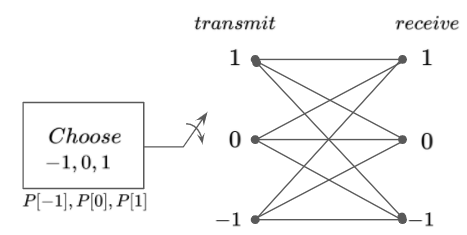

#### Answer:

Let $A = \{$ error $\}$. We partition the transmission values $S=B_1\cup B_2\cup B_3$ into three groups $\{-1\},\{0\},\{1\}$ respectively. We are given the fact that $P[A|-1] = P[A|1] = \frac{1}{8}$ and $P[A|0] = \frac{3}{4}$. We are also given $P[-1]=P[1]=\frac{1}{4}$ and $P[0]=\frac{1}{2}$. Thus, by the Law of Total Probability

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]} \\
             \\
             &= {P[A| 1]P[1]} + {P[A| 0]P[0]} + {P[A| 1]P[1]} \\
             \\
             &= \big( \frac{1}{8}\big)\big( \frac{1}{4}\big) + \big( \frac{3}{4} \big)\big( \frac{1}{2}\big) + \big( \frac{1}{8}\big)\big( \frac{1}{4}\big) \\
             \\
             &= \frac{14}{32}.
    \end{split}
\end{equation}
$$

If $P[-1]=P[1]=P[0]$ (and the error rates remain the same), then I'll assume $\sum_{k\in\{-1,0,1\}}{P[k]}=1$ so $P[k]=\frac{1}{3}$ for $\forall k$. Then

$$
\begin{equation}
    \begin{split}
        P[A] &= \sum_{i=1}^{N}{P[A| B_i]P[B_i]} \\
             \\
             &= {P[A| 1]P[1]} + {P[A| 0]P[0]} + {P[A| 1]P[1]} \\
             \\
             &= \big( \frac{1}{8}\big)\big( \frac{1}{3}\big) + \big( \frac{3}{4} \big)\big( \frac{1}{3}\big) + \big( \frac{1}{8}\big)\big( \frac{1}{3}\big) \\
             \\
             &= \frac{8}{24}.
    \end{split}
\end{equation}
$$

***
### 4.14 😃(w)

A sample space is given by $S = \{ (x,y): 0\leq x \leq 1,0\leq y \leq 1 \}$. Determine $P[A|B]$ for the events

$$
A = \{ (x,y): y\leq 2x, 0\leq x \leq \frac{1}{2}, y \leq 2-2x, \frac{1}{2}\leq x\leq 1 \}
$$
$$
B = \{ (x,y): \frac{1}{2} \leq x \leq 1,0\leq y \leq 1 \}
$$

Are $A$ and $B$ independent?

#### Answer:

We know that $P[A|B] = \frac{P[A\cap B]}{P[B]}$ so we just need to find $P[A\cap B]$ and $P[B]$ individually then divide. We notice that $A\cap B = \{(x,y): x\in[\frac{1}{2},1], y\leq 2-2x\}$ and $|A\cap B|=\frac{1}{2}\big( \frac{1}{2}\big)(1) = \frac{1}{4}$, i.e. the area of the triangle, so $P[A\cap B] = \frac{|A\cap B|}{|S|} = \frac{1}{4}$. The probability of $B$ is immediately identifiable as $P[B] = \frac{1}{2}(1) = \frac{1}{2}$, i.e. the area of the rectangle. Hence, 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{ \big(\frac{1}{4} \big)}{\big( \frac{1}{2} \big)} \\
               \\
               &= \frac{1}{2}
    \end{split}
\end{equation}
$$

The condition for statistical independence is if $P[A\cap B] = P[A]P[B]$. We first need to calculate $P[A] = 2\big(\frac{1}{2}\big)(1) = \frac{1}{2}$. Thus, $P[A]P[B] = \big(\frac{1}{2}\big)\big(\frac{1}{2}\big) = \frac{1}{4}$ and we already found that $P[A\cap B] = \frac{1}{4}$, so they are independent.

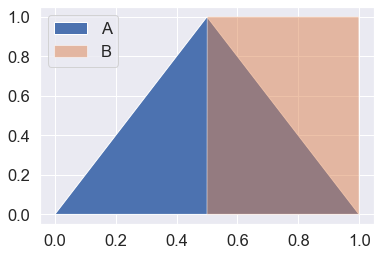

In [49]:
# Define set A
x = np.arange(0, 1.001, 0.001)
fa = np.where(x < 0.5, 2*x, 2-2*x)

# Define set B
xb = x[len(x)//2:]
fb = np.where(xb <= 0.5, 0, 1)
fb[-1] = 0 # set the boundary element to 0 so the fill plot is correct

plt.fill(x, fa, label='A')
plt.fill(xb, fb, alpha=0.5, label='B')
plt.legend()
plt.show()

***
### 4.15 (w)

A sample space is given by $S = \{ (x,y): 0\leq x \leq 1,0\leq y \leq 1 \}$. Are the events

$$
A = \{ (x,y): y\leq x \}
$$
$$
B = \{ (x,y): y \leq 1-x \}
$$

independent? Repeat if $B = \{ (x,y): x \leq \frac{1}{4} \}$.

#### Answer:

The condition for statistical independence is if $P[A\cap B] = P[A]P[B]$. Let's check if both sides are satisfied:

- $P[A\cap B] = 2\bigg( \frac{1}{2}\big( \frac{1}{2}\big) \big( \frac{1}{2}\big) \bigg)= \frac{1}{4}$


- $P[A]P[B] = \bigg( \frac{1}{2}(1)(1)\bigg)\bigg( \frac{1}{2}(1)(1)\bigg) = \frac{1}{4}$

Thus we can conclude that they are independent. 

Now if $B = \{ (x,y): x \leq \frac{1}{4} \}$, then 

- $P[A\cap B] =  \frac{1}{2}\big( \frac{1}{4}\big)\big( \frac{1}{4}\big) = \frac{1}{32}$


- $P[A]P[B] = \bigg(  \frac{1}{2} (1)(1)\bigg)\bigg( \big(\frac{1}{4}\big)(1)\bigg) = \frac{1}{8}$

Thus we can conclude that they are not independent. 

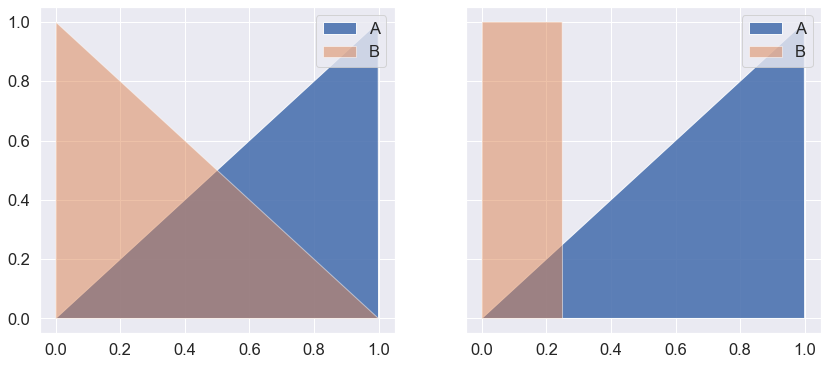

In [44]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14,6))

# Define set A
x = np.arange(0, 1.001, 0.001)
fa = np.where(x < 1, x, 0)
# Define set B
fb = np.where(x > 0, 1-x, 0)
# Define set B2
fb2 = np.where(x < .25, 1, 0)
fb2[0], fb2[-1] = 0, 0 # Fix boundary points

# Plot
ax[0].fill(x, fa, alpha=0.9, label='A')
ax[0].fill(x, fb, alpha=0.5, label='B')
ax[0].legend()

ax[1].fill(x, fa, alpha=0.9, label='A')
ax[1].fill(x, fb2, alpha=0.5, label='B')
ax[1].legend()
plt.show()

***
### 4.16 (t)

Give an example of two events that are mutually exclusive but not independent. Hint: See Figure 4.4.

#### Answer:

- If $A,B$ are mutually exclusive and $B$ occurs, then $P[A|B] = 0$


- If $A,B$ are independent and $B$ occurs, then $P[A|B] = P[A]$


Therefore, let's construct a sample space $S = \{ (x,y): 0\leq x \leq 1,0\leq y \leq 1 \}$ and two events

$$
A = \{ (x,y): x\in[0,\frac{1}{2}] \}
$$
$$
B = \{ (x,y): x\in[\frac{1}{2},1] \}.
$$

We see that $A\cap B = \emptyset$ so $P[A|B] = 0$ and $P[A]P[B] = \big(\frac{1}{2}\big) \big(\frac{1}{2}\big) = \frac{1}{4}$ so the two events are mutually exclusive and not independent.

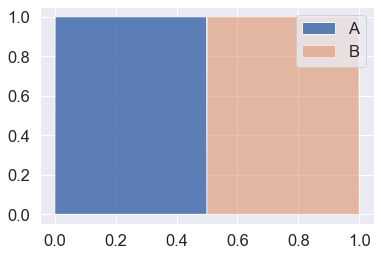

In [48]:
# Define set A
x = np.arange(0, 1.001, 0.001)
fa = np.where(x < 0.5, 1, 0)
fa[0] = 0

# Define set B
fb = np.where(x >= 0.5, 1, 0)
fb[len(x)//2], fb[-1] = 0, 0 # set the boundary element to 0 so the fill plot is correct

plt.fill(x, fa, alpha=0.9, label='A')
plt.fill(x, fb, alpha=0.5, label='B')
plt.legend()
plt.show()

***
### 4.17 (t) 

Consider the sample space $S = \{ (x,y,z): 0\leq x \leq 1, 0\leq y \leq 1, 0\leq z \leq 1 \}$, which is the unit cube. Can you find three events that are independent? Hint: See Figure 4.2c.

#### Answer:

Let's construct three boxes and find their probabilities by calculating their volumes, $V = L_xL_yL_z$.

$$
A = \{ (x,y,z): 0\leq x \leq 1, 0\leq y \leq 1, 0\leq z \leq \frac{1}{2} \}
$$

$$
B = \{ (x,y,z): \frac{1}{2}\leq x \leq 1, 0\leq y \leq 1, 0\leq z \leq 1 \}
$$

$$
C = \{ (x,y,z): \frac{3}{8}\leq x \leq \frac{5}{8}, 0\leq y \leq 1, \frac{3}{8}\leq z \leq \frac{5}{8} \}
$$

- $P[A] = (1)(1)\big( \frac{1}{2}\big) = \frac{1}{2}$
- $P[B] = \big( \frac{1}{2}\big)(1)(1) = \frac{1}{2}$
- $P[C] = \big( \frac{1}{4}\big)(1)\big( \frac{1}{4}\big) = \frac{1}{16}$


- $P[A\cap B] = \big( \frac{1}{2}\big) (1) \big( \frac{1}{2}\big) = \frac{1}{4}$
- $P[A]P[B] = \big(  \frac{1}{2} \big)\big( \frac{1}{2} \big) = \frac{1}{4}$


- $P[A\cap C] =  \big( \frac{1}{4}\big)(1)\big( \frac{1}{8}\big) = \frac{1}{32}$
- $P[A]P[C] = \big(  \frac{1}{2} \big)\big( \frac{1}{16} \big) = \frac{1}{32}$


- $P[B\cap C] =  \big( \frac{1}{8}\big)(1)\big( \frac{1}{4}\big) = \frac{1}{32}$
- $P[B]P[C] = \big(  \frac{1}{2} \big)\big( \frac{1}{16} \big) = \frac{1}{32}$


- $P[A\cap B\cap C] =  \big(\frac{1}{8}\big)(1)\big( \frac{1}{8}\big) = \frac{1}{64}$
- $P[A]P[B]P[C] = \big( \frac{1}{2}\big) \big( \frac{1}{2}\big) \big( \frac{1}{16}\big) = \frac{1}{64}$

***
### 4.18 (t)

Show that if $P[ABC] = P[A]P[B]P[C]$ is satisfied for _all_ possible events, then pairwise independence follows. In this case all events are independent.

#### Answer:

Let's assume that  $P[ABC] = P[A]P[B]P[C]$ is satisfied for all possible events $A,B,C$. Then by the associative property

$$
\begin{equation}
    \begin{split}
        P[ABC] &= P[A]P[BC] \\
               &= P[B]P[AC] \\
               &= P[C]P[AB].
    \end{split}
\end{equation}
$$

Due to the RHS of our assumption

$$
\begin{equation}
    \begin{split}
        P[A]P[B]P[C] &= P[A]P[BC] \\
                     &= P[B]P[AC] \\
                     &= P[C]P[AB]
    \end{split}
\end{equation}
$$

which implies
 
 $$
\begin{equation}
    \begin{split}
        P[BC] &= P[B]P[C] \\
        P[AC] &= P[A]P[C] \\
        P[AB] &= P[A]P[B]. 
    \end{split}
\end{equation}
$$

Thus, $A,B,C$ are pairwise independent.

***
### 4.19 😃(f)

It is known that that if it rains, there is a $50\%$ chance that a sewer will overflow. Also, if the sewer overflows, then there is a $30\%$ chance that the road will flood. If there is a $20\%$ chance that it will rain, what is the probability that the road will flood?

#### Answer:

Let $C = \{$ Rains $\}$, $B = \{$ The sewer overflows $\}$, and $A = \{$ The road floods $\}$. Notice that $A\subset B \subset C$ because the sewer can't overflow unless it rains, and the road can't flood unless unless the sewer overflows which requires it to rain. Thus, we can assume $A\cap B\cap C = A$ and other combinations like $B\cap C = B$. We are given the following information:

- $P[B|C] = 0.5$
- $P[A|B] = 0.3$
- $P[C] = 0.2$

The strategy here is use use the **Probability Chain Rule:**

 $$
\begin{equation}
    \begin{split}
        P[A\cap B\cap C] &= P[A|B\cap C]P[B\cap C] \\
                         \\
                         &= P[A|B\cap C]P[B|C]P[C] \\
                         \\
                         &= P[A|B]P[B|C]P[C] \\
                         \\
                         &= (0.3)(0.5)(0.2) \\
                         \\
                         &=0.03. 
    \end{split}
\end{equation}
$$

***
### 4.20 (w)

Consider the sample space $S= \{ 1,2,3,4 \}$. Each simple event is equally likely. If $A=\{1,2\},B=\{1,3\},C=\{1,4\}$ are these events pairwise independent? Are they independent?

#### Answer:

First notice that $P[A]=P[B]=P[C] = \frac{2}{4}$ because each set has the same number of elements and each simple event is equally likely. Next, we'll analyze various intersections:

- $A\cap B\cap C = A\cap B = A\cap C = B\cap C =\{1\}$


- $|A\cap B\cap C| = |A\cap B| = |A\cap C| = |B\cap C| = 1$


- $P[A\cap B\cap C] = P[A\cap B] = P[A\cap C] = P[B\cap C] = \frac{1}{4}$

Hence, $P[i]P[j] = \frac{1}{4}$ for $\forall i,j: i\neq j$, so we can conclude that $A,B,C$ are pairwise independent. For true independence $P[A]P[B]P[C] = \frac{1}{8}$ must equal $P[A\cap B\cap C] = \frac{1}{4}$, so $A,B,C$ are not independent.

***
### 4.21 😃(w)

In Example 4.6 determine if the events are pairwise independent. Are they independent?

#### Answer:

Here, the sample space $S=\{1,2,3,4,5,6\}$ and $A=\{2,4,6\}$, $B=\{3,4,5,6\}$, and $C=\{1,2,3,4\}$. 

 Set Representation |Probability of interest | Value        | Independence Calculation  | Value          | Do they match?
--------------------|------------------------|--------------|---------------------------|----------------|---------------
 $\{4\}$            |$P[A\cap B\cap C]$      | $\frac{1}{6}$|  $P[A]P[B]P[C]$           |$\frac{48}{216}$| No
 $\{4,6\}$          |$P[A\cap B]$            | $\frac{2}{6}$|  $P[A]P[B]$               |$\frac{12}{36}$ | Yes
 $\{2,4\}$          |$P[A\cap C]$            | $\frac{2}{6}$|  $P[A]P[C]$               |$\frac{12}{36}$ | Yes
 $\{3,4\}$          |$P[B\cap C]$            | $\frac{2}{6}$|  $P[B]P[C]$               |$\frac{16}{36}$ | No

Thus, we can conclude that $A,B,C$ are neither pairwise independent or independent.

***
### 4.22 😃(w)

An urn contains 4 red balls and 2 black balls. Two balls are chosen in succession without replacement. If it is known that the first ball drawn is black, what are they odds in favor of a red ball being chosen on the second draw?

#### Answer:

Let $A = \{2^{nd}$ ball is red $\}$ and $B = \{1^{st}$ ball is black $\}$. Then $P[A|B]=\frac{4}{5}$ using the concept of reduced sample space because there are 5 balls left in the urn after $B$ occurs, of which, 4 are red and 1 is black. Hence, there are $4:1$ odds in favor of red. 

Alternatively, we could use combinatorial analysis to arrive at the same answer. Here $P[B] = \frac{{2\choose 1}}{{6\choose 1}} = \frac{1}{3}$ and $P[A\cap B] = \frac{{2\choose 1}{4\choose 1}}{{6\choose 1}{5\choose 1}} = \frac{8}{30}$ so 

$$
\begin{equation}
    \begin{split}
        P[A|B] &= \frac{P[A\cap B]}{P[B]} \\
               \\
               &= \frac{\big(\frac{8}{30}\big)}{\big(\frac{1}{3} \big)} \\
               \\
               &= \frac{4}{5}.
    \end{split}
\end{equation}
$$

***
### 4.23 (w)

In Example 4.7 plot the probability that the person has cancer given that the test results are positive, i.e. the posterior probability, as a function of the prior probability $P[B]$. How is the posterior probability that the person has cancer related to the prior probability?

#### Answer:

In this example the author used **Bayes Theorem** to find

$$
\begin{equation}
    \begin{split}
        P[B|A] &= \frac{P[A|B]P[B]}{P[A|B]P[B] + P[A|B^c]P[B^c]} \\
               \\
               &= \frac{P[A|B]P[B]}{P[A|B]P[B] + P[A|B^c](1 - P[B])} \\
               \\
               &= \frac{0.99P[B]}{0.99P[B] + 0.2(1 - P[B])} \\
    \end{split}
\end{equation}
$$

for two different values of $P[B]$. Here, we'll just leave the prior probability as a variable when plotting the posterior probability. 

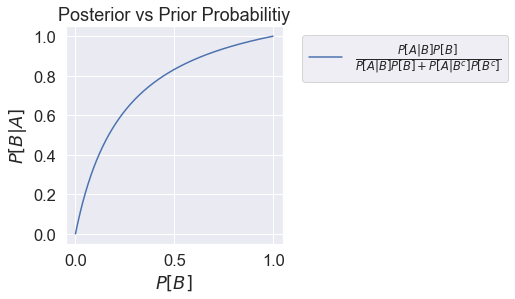

In [70]:
fig, ax = plt.subplots()
prior = np.arange(0, 1, 0.001)
Pa_given_b = 0.99 # Positive result from blood test
Pa_given_bc = 0.2 # False positive

posterior = ( Pa_given_b*prior ) / ( Pa_given_b*prior + Pa_given_bc*(1 - prior))

ax.plot(prior, posterior, label=r'$\frac{P[A|B]P[B]}{P[A|B]P[B] + P[A|B^c]P[B^c]}$')

ax.set_title('Posterior vs Prior Probabilitiy')
ax.set_xlabel(r'$P[B]$')
ax.set_ylabel(r'$P[B|A]$')
ax.set_aspect(1)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

***
### 4.24 (w)

An experiment consists of two subexperiments. First, a number is chosen at random from the interval $(0,1)$. Then, a second number is chosen at random from the same interval. Determine the sample space $S^2$ for the overall experiment. Next consider the event $A = \{ (x,y): \frac{1}{4} \leq x \leq \frac{1}{2}, \frac{1}{2} \leq y \leq \frac{3}{4} \}$ and find $P[A]$. Relate $P[A]$ to the probabilities defined on $S^1 = \{ u: 0< u < 1 \}$ where $S^1$ is the sample space for each subexperiment.

#### Answer:

The simple space $S^2 = (0,1)\times (0,1)$ which is the unit square. These experiments are defined to be **independent subexperiments** where $A_1 = \{x\in[\frac{1}{4}, \frac{1}{2}]\}$ and $A_2 = \{y\in[\frac{1}{2}, \frac{3}{4}]\}$, and $A = A_1\cap A_2$. Hence, we can calculate the joint probability from the marginals:

$$
\begin{equation}
    \begin{split}
        P[A] &= P[A_1\cap A_2] \\
             \\
             &= P[A_1]P[A_2] \\
             \\
             &= \frac{\big( \frac{1}{2} - \frac{1}{4} \big)}{(1 - 0)} \frac{\big( \frac{3}{4} - \frac{1}{2} \big)}{(1 - 0)} \\
             \\
             &= \frac{\big( \frac{1}{4}\big)}{(1 )} \frac{\big(\frac{1}{4} \big)}{( 1 )} \\
             \\
             &= \frac{1}{16} \\
    \end{split}
\end{equation}
$$

***
### 4.25 (w,c)

A fair coin is tossed 10 times. What is the probability of a run of exactly 5 heads in a row? Do not count runs of 6 or more heads in a row. Now verify your solution using a computer simulation.

#### Answer:

Each possible outcome is represented by a $10-$tuple of Bernoulli trials $(b_1,b_2,\dots,b_{10})$ and the event of interest, $A = \{$ a run of exactly 5 heads in a row $\}$ is given by

$$
\begin{equation}
    \begin{split}
        A = \{&(H,H,H,H,H,T,T,T,T,T), \\
              &(T,H,H,H,H,H,T,T,T,T), \\
              &(T,T,H,H,H,H,H,T,T,T), \\
              &(T,T,T,H,H,H,H,H,T,T), \\
              &(T,T,T,T,H,H,H,H,H,T), \\
              &(T,T,T,T,T,H,H,H,H,H)\}
    \end{split}
\end{equation}
$$

where $|A| = 6$. There are $|S| = {2\choose 1}^{10} = 2^{10}$ possible outcomes, so $P[A] = \frac{6}{2^{10}} \approx 0.0059$.

In [80]:
N = 100000
m = 10    # Flip m times 
p = 0.5   # Bias of coin

# The set of a run of exactly 5 heads in a row
A = set([(1,1,1,1,1,0,0,0,0,0),
         (0,1,1,1,1,1,0,0,0,0),
         (0,0,1,1,1,1,1,0,0,0),
         (0,0,0,1,1,1,1,1,0,0),
         (0,0,0,0,1,1,1,1,1,0),
         (0,0,0,0,0,1,1,1,1,1)])

event = []
for i in range(N):
    x = tuple(np.random.binomial(1, p, 10))
    event.append(True if x in A else False)

prob = sum(event) / N 
prob

0.00584

***
### 4.26 😃(w)

A lady claims that she can tell whether a cup of tea containing milk had the tea poured first or the milk poured first. To test her claim an experiment is set up whereby at random the milk or tea is added first to an empty cup. This experiement is repeated 10 times. If she correctly identifies which liquid was poured first 8 out of 10, how likely is it that she is guessing? See [Salsburg 2001](https://www.amazon.com/Lady-Tasting-Tea-Statistics-Revolutionized/dp/0805071342) for a further discussion of the famous problem.

#### Answer:

We can model this experiment using the Binomial probability law where $M=10$ and $k=8$ because there are only two outcomes of the taste test (successful identification or failure to identify) and multiple trials. We will assume "guessing" means a $50-50$ chance so $p=0.5$.

$$
\begin{equation}
    \begin{split}
        P[8] &= {M\choose k}p^k(1-p)^{M-k} \\
             \\
             &= {10\choose 8}p^8(1-p)^{2} \\
             \\
             &= 45\big(\frac{1}{2}\big)^8(1-\frac{1}{2})^{2} \\
             \\
             &= 45\big(\frac{1}{2}\big)^{10} \\
             \\
             &\approx 0.044.
    \end{split}
\end{equation}
$$

***
### 4.27 (f)

The probability $P[k]$ is given by the binomial law. If $M=10$, for what value of $p$ is $P[3]$ maximum? Explain your answer.

#### Answer:

To solve this problem we'll need to write out the binomial probability law, take the derivate with respect to $p$, set it equal to zero, then solve for the optimal value, $p_*$. 


$$
\begin{equation}
    \begin{split}
        \frac{d}{dp}P[3] &= \frac{d}{dp}\bigg( {10\choose 3}p^3(1-p)^{7} \bigg)\\
                         \\
                         &= 120\big( 3p^2(1-p)^{7} - 7p^3(1-p)^6 \big). \\
                         \\
                       0 &= 360p_*^2(1-p_*)^{7} - 840p_*^3(1-p_*)^6 \\
                         \\
           840p_*^3(1-p_*)^6 &= 360p_*^2(1-p_*)^{7} \\
                         \\
                     p_* &= \frac{360}{360 + 840}\\
                         \\
                         &= 0.3.
    \end{split}
\end{equation}
$$

***
### 4.28 😃(f)

A sequence of independent subexperiments is conducted. Each subexperiement has the outsomes "success", "failure", or "don't know". If $P[success]=\frac{1}{2}$ and $P[failure]=\frac{1}{4}$, what is the probability of 3 successes in 5 trials?

#### Answer:

Let $A = \{$ 3 successes in 5 trials $\}$. We can determine the probability using the multinomial probability law using the following groupings: $k_{success} = 3$ and $k_{other} = 2$ where "other" represents either "don't know" or "failure". We lump them together because we aren't interested in any specific number of "don't knows" or "failures", just the fact that either could happen. We already know that $P[success]=\frac{1}{2}$, however, $P[other]= P[failure] + P[don't know] = \frac{1}{2}$ because $\sum_i{P[i]}=1$. Thus, the probability is

$$
\begin{equation}
    \begin{split}
        P[A] &= {M\choose {k_1,\dots,k_n}}p^{k_1}\dots p^{k_n} \\
             \\
             &= {5 \choose {3,2}}\big(\frac{1}{2}\big)^{3} \big(\frac{1}{4} + \frac{1}{4} \big)^{2} \\
             \\
             &= \frac{5!}{3!2!}\big(\frac{1}{2}\big)^{5} \\
             \\
             &= \frac{10}{2^{5}}\\
             \\
             &= \frac{5}{16}\\
             \\
             &= 0.3125
    \end{split}
\end{equation}
$$

***
### 4.29 (c)

Verify your results in Problem 4.28 by using a computer simulation.

#### Answer:

This is equivalent to flipping a fair coin 5 times and counting how many times 3 heads show up, because we can group the states into $success$ and $other$, i.e. $H$ or $T$. To estimate the probability we need to count how many times the event occurs and divide by how many times we repeated the experiment.

In [45]:
N = 10000
event = []
for i in range(N):
    x = np.random.binomial(1, p=0.5, size=5)
    event.append(True if sum(x)==3 else False)

prob = sum(event) / N
prob

0.3207

***
### 4.30 (w)

A drunk person wanders aimlessly along a path by going forward one step with probability $\frac{1}{2}$ and going backward one step with probability $\frac{1}{2}$. After 10 steps what is the probability that he has moved 2 steps forward?

#### Answer:

Let $A = \{$Moved 2 steps forward after taking 10 steps$\}$. Each trial has two outcomes, forwards or backwards, with probabilities $\frac{1}{2}$ and $\frac{1}{2}$ respectively so we can model them as Bernoulli trials with $p=\frac{1}{2}$. Furthermore, there are $|S| = {2 \choose 1}^{10} = 2^{10}$ possible outcomes. If $M=10$ (or any even number for the matter) it is impossible to end up with a net odd number of steps. We can determine the number of steps using the multinomial coefficient with $k_1$ representing the number of steps taken backwards and $k_2$ representing the number of steps taken forwards.

Net Steps | Number of ways if $M=10$
----------|-------------------------
-10       | ${10\choose{10,0}} = 1$
-9        | 0
-8        | ${10\choose{9,1}} = 10$
-7        | 0
-6        | ${10\choose{8,2}} = 45$
-5        | 0
-4        | ${10\choose{7,3}} = 120$
-3        | 0
-2        | ${10\choose{6,4}} = 210$
-1        | 0
0         | ${10\choose{5,5}} = 252$
1         | 0
2         | ${10\choose{4,6}} = 210$
3         | 0
4         | ${10\choose{3,7}} = 120$
5         | 0
6         | ${10\choose{2,8}} = 45$
7         | 0
8         | ${10\choose{1,9}} = 10$
9         | 0
10        | ${10\choose{0,10}}= 1$

If we look closely, we can see that these are the numbers from the $10^{th}$ row of Pascal's Triangle. This is due to the fact that we have two possible states so the multinomial formula reduces to the binomial formula. Therefore, 

$$
\begin{equation}
    \begin{split}
        P[A] &= {M\choose {k_1,\dots,k_n}}p^{k_1}\dots p^{k_n} \\
             \\
             &= {10 \choose {4,6}}\big(\frac{1}{2}\big)^{4} \big(\frac{1}{2} \big)^{6} \\
             \\
             &= \frac{10!}{4!6!}\big(\frac{1}{2}\big)^{10} \\
             \\
             &= \frac{210}{2^{10}}\\
             \\
             &= \frac{210}{1024}\\
             \\
             &\approx 0.21
    \end{split}
\end{equation}
$$

***
### 4.31 (f)

Prove that the geometric probability law (4.17) is a vaild probability assignment.

#### Answer:

We are given the fact that $p\in(0,1)$. Also, for convenice, let $u = (1-p)\in(0,1)$. Then by Axiom 1:

$$
\begin{equation}
    \begin{split}
        \sum_{k=1}^{\infty}P[k] &= \sum_{k=1}^{\infty}(1-p)^{k-1}p \\
                                \\
                                &= p\sum_{k=1}^{\infty}(1-p)^{k}(1-p)^{-1} \\
                                \\
                                &= \frac{p}{u}\sum_{k=1}^{\infty}u^k \\
                                \\
                                &= \frac{p}{u}\bigg( \frac{u}{1-u} \bigg)\\
                                \\
                                &= p\bigg( \frac{1}{1-(1-p)} \bigg)\\
                                \\
                                &= 1.
    \end{split}
\end{equation}
$$

***
### 4.32 (w)


For a sequence of independent Bernoulli trials find the probability of the first failure at the $k^{th}$ trial for $k=1,2,\dots$.

#### Answer:

Let $A = \{$first failure at the $k^{th}$ trial$\}$ where each subexperiment is an independent Bernoulli trial. Then

$$
\begin{equation}
    \begin{split}
        P[A] &= P[(1,1,\dots,1,0)_{1\times k}] \\
             \\
             &= P[1]P[1]\dots P[1]P[0] \\
             \\
             &= p^{k-1}(1-p) 
    \end{split}
\end{equation}
$$

***
### 4.33 😃(w)

For a sequence of independent Bernoulli trials find the probability of the second success at the $k^{th}$ trial.

#### Answer:

Let $A = \{$the second success at the  $k^{th}$  trial$\} = A_1\cap A_2$ where $A_1 = \{1$ success in $k-1$ trials$\}$ and $A_2 = \{1$ success in  $1$  trial$\}$. Then

$$
\begin{equation}
    \begin{split}
        P[A] &= P[A_1\cap A_2] \\
             \\
             &= P[A_1]P[A_2]  \\
             \\
             &= \bigg({{k-1}\choose 1}p(1-p)^{k-2}\bigg)(p) \\
             \\
             &= {{k-1}\choose 1}p^2(1-p)^{k-2}
    \end{split}
\end{equation}
$$

for $k = 2,3,\dots$

***
### 4.34 (t)

Consider a sequence of independent Bernoulli trials. If it is known that the first $m$ trials resulted in failures, prove that the probabilityof the first success occuring at $m+l$ is given by the geometric law with $k$ replaced by $l$. In other words, the probability is the same as if we had started the process over again after the $m^{th}$ failure. There is no memory of the first $m$ failures.

#### Answer:

Let $A = \{(0,\dots,0,0,\dots,0,1)_{1\times (m+l)}\} $. Since this is a sequence of independent Bernoulli trials

$$
\begin{equation}
    \begin{split}
        P[A] &= P[\{(0,\dots,0,0,\dots,0,1)_{1\times (m+l)}\}] \\
             \\
             &= P[0]\dots P[0]P[1]  \\
             \\
             &= (1-p)^{m+l-1}p \\
             \\
             &= P[k]
    \end{split}
\end{equation}
$$

where $P[k]$ denotes the Geometric Probability Law. We can also partition $A = B\cap C$ where $B = \{(0,\dots,0)_{1\times m}\}$ and $C = \{(0,\dots,0,1)_{1\times l}\}$ to show that the suggested method will yield the same answer.

$$
\begin{equation}
    \begin{split}
        P[A] &= P[\{(0,\dots,0,0,\dots,0,1)_{1\times (m+l)}\}] \\
             \\
             &= P[B\cap C]  \\
             \\
             &= \big(P[0]\dots P[0]\big)\big(P[0]\dots P[0]P[1]\big)  \\
             \\
             &= \big( (1-p)^m\big)\big( (1-p)^{l-1}p \big)  \\
             \\
             &= (1-p)^{m+l-1}p
    \end{split}
\end{equation}
$$

***
### 4.35 (f)

An urn contains red, black, and white balls. The proportion of red is 0.4, the proportion of black is 0.4, and the proportion of white is 0.2. If 5 balls are drawn with replacement, what is the probability of 2 red, 2 black, and 1 white in any order?

#### Answer:

Let $p_{red} = p_{black} = 0.4$ and $p_{white} = 0.2$. If $M=5$ balls are drawn _with replacement_ (this assumption is important because it essentially means we can assume independent trials) we may use the multinomial probability law to determine $A = \{$ 2 red, 2 black, and 1 white in any order $\}$.

$$
\begin{equation}
    \begin{split}
        P[A] &= {M\choose {k_1,\dots,k_n}}p^{k_1}\dots p^{k_n} \\
             \\
             &= {5 \choose {2,2,1}}\big(\frac{1}{2}\big)^{4} \big(\frac{1}{2} \big)^{6} \\
             \\
             &= \frac{5!}{2!2!1!}(0.4)^{2}(0.4)^{2}(0.2)^{1} \\
             \\
             &= \frac{120}{4}\big(\frac{4}{25}\big)\big(\frac{4}{25}\big)\big(\frac{1}{5}\big)\\
             \\
             &= \frac{96}{625}\\
             \\
             &= 0.1536
    \end{split}
\end{equation}
$$

***
### 4.36 (t)

We derive the multinomial coefficient for $N=3$. This will yield the number of ways that an $M$-tuple can be formed using $k_1$ $1$s, $k_2$ $2$s, and $k_3$ $3$s. To do so choose $k_1$ places in the $M$-tuple for the $1$s. There will be $M-k_1$ positions remaining. Of these positions choose $k_2$ places for the $2$s. Fill in the remaining $k_3=M-k_1-k_2$ positions using the $3$s. Using this result, determine the number of different $M$ digit sequences with $k_1$ $1$s, $k_2$ $2$s, and $k_3$ $3$s.

#### Answer:

![finish-me.jpg](https://i.pinimg.com/564x/a4/b6/38/a4b638b7d6926e4f494b1d94459052ff.jpg)

***
### 4.37 (t)

Show that the multinomial probability law reduces to the binomial law for $N=2$.

#### Answer:

If $N=2$ the multinomial constraints are $k_1 + k_2 = M$ and $p_1 + p_2 = 1$. Then if we let $p_2 = 1 - p_1$ and $k_2 = M - k_1$ we see that

$$
\begin{equation}
    \begin{split}
        P[k_1,\dots,k_N] &= {M\choose {k_1,\dots,k_N}}p^{k_1}\dots p^{k_N} \\
                         \\
                         &= {M \choose {k_1,k_2}}p_1^{k_1} p_2^{k_2} \\
                         \\
                         &= \frac{M!}{k_1!(M - k_1)!}p_1^{k_1} (1 - p_1)^{M - k_1} \\
                         \\
                         &= {M\choose k_1} p_1^{k_1} (1 - p_1)^{M - k_1}
    \end{split}
\end{equation}
$$

which is the Binomial Law with $k = k_1$ and $p = p_1$.

***
### 4.38 😃(w,c)

An urn contains 3 red balls, 3 black balls, and 3 white balls. If 6 balls are chosen with replacement, how many of each color is most likely? Hint: You will need a computer to evaluate the probabilities.

#### Answer:

Intuitively, since each ball is of equal proportion we would expect and equal proportion of balls to be drawn. The Multinomial Probability Law is a good choice for this problem and we'll let $p_R=p_B=p_W=\frac{1}{3}$. 

$$
\begin{equation}
    \begin{split}
        P[k_R,k_B,k_W] &= {6\choose {k_R,k_B,k_W}}\big(\frac{1}{3}\big)^{k_R}\big(\frac{1}{3}\big)^{k_B}\big(\frac{1}{3}\big)^{k_W} \\
                       \\
                       &= {6\choose {k_R,k_B,k_W}}\big(\frac{1}{3}\big)^{k_R + k_B + k_W}.
    \end{split}
\end{equation}
$$

Since $k_1+k_2+k_3=6$ and each draw is done **with replacement**, $k_i\in\{0,1,2,3,4,5,6\}$ and there is a relatively small number of combinations of each color. Let's enumerate them in the table below:

$k_R$|$k_B$|$k_W$|Multinomial Coefficient    |$P[k_R,k_B,k_W]$ 
-----|-----|-----|---------------------------|----------------------------------
0    |0    |6    |${6\choose{0,0,6}}=1$      | $\frac{1}{3^6} \approx 0.001$
0    |1    |5    |${6\choose{0,1,5}}=6$      | $\frac{6}{3^6} \approx 0.008$
0    |2    |4    |${6\choose{0,2,4}}=15$     | $\frac{15}{3^6} \approx 0.021$
0    |3    |3    |${6\choose{0,3,3}}=20$     | $\frac{20}{3^6} \approx 0.027$
0    |4    |2    |${6\choose{0,4,2}}=15$     | $\frac{15}{3^6} \approx 0.021$
0    |5    |1    |${6\choose{0,5,1}}=6$      | $\frac{6}{3^6} \approx 0.008$
0    |6    |0    |${6\choose{0,6,0}}=1$      | $\frac{1}{3^6} \approx 0.001$
1    |0    |5    |${6\choose{1,0,5}}=6$      | $\frac{6}{3^6} \approx 0.008$
1    |1    |4    |${6\choose{1,1,4}}=30$     | $\frac{30}{3^6} \approx 0.041$
1    |2    |3    |${6\choose{1,2,3}}=60$     | $\frac{60}{3^6} \approx 0.082$
1    |3    |2    |${6\choose{1,3,2}}=60$     | $\frac{60}{3^6} \approx 0.082$
1    |4    |1    |${6\choose{1,4,1}}=30$     | $\frac{30}{3^6} \approx 0.041$
1    |5    |0    |${6\choose{1,5,0}}=6$      | $\frac{6}{3^6} \approx 0.008$
2    |0    |4    |${6\choose{2,0,4}}=15$     | $\frac{15}{3^6} \approx 0.021$
2    |1    |3    |${6\choose{2,1,3}}=60$     | $\frac{60}{3^6} \approx 0.082$
**2**|**2**|**2**|${6\choose{2,2,2}}=90$     | $\frac{90}{3^6} \approx 0.123$
2    |3    |1    |${6\choose{2,3,1}}=60$     | $\frac{60}{3^6} \approx 0.082$
2    |4    |0    |${6\choose{2,4,0}}=15$     | $\frac{15}{3^6} \approx 0.021$
3    |0    |3    |${6\choose{3,0,3}}=20$     | $\frac{20}{3^6} \approx 0.027$
3    |1    |2    |${6\choose{3,1,2}}=60$     | $\frac{60}{3^6} \approx 0.082$
3    |2    |1    |${6\choose{3,2,1}}=60$     | $\frac{60}{3^6} \approx 0.082$
3    |3    |0    |${6\choose{3,3,0}}=20$     | $\frac{20}{3^6} \approx 0.027$
4    |0    |2    |${6\choose{4,0,2}}=15$     | $\frac{15}{3^6} \approx 0.021$
4    |1    |1    |${6\choose{4,1,1}}=30$     | $\frac{30}{3^6} \approx 0.041$
4    |2    |0    |${6\choose{4,2,0}}=15$     | $\frac{15}{3^6} \approx 0.021$
5    |0    |1    |${6\choose{5,0,1}}=6$      | $\frac{6}{3^6} \approx  0.008$
5    |1    |0    |${6\choose{5,1,0}}=6$      | $\frac{6}{3^6} \approx  0.008$
6    |0    |0    |${6\choose{6,0,0}}=1$      | $\frac{1}{3^6} \approx 0.001$

Therefore, our intuition is confirmed since $2$ of each color yields the highest probability.

In [7]:
# Check if our probabilities sum to 1
summ = 3*(1/3**6) + 6*(6/3**6) +  6*(15/3**6) +  3*(20/3**6) +  3*(30/3**6) + 6*(60/3**6) + (90/3**6)
print(summ)

0.9999999999999999


In [12]:
R, B, W = ['R']*3, ['B']*3, ['W']*3
urn = R+B+W

# Every combination of 6 balls with replacement
outcomes = [(x1,x2,x3,x4,x5,x6) for x1 in urn for x2 in urn for x3 in urn for x4 in urn for x5 in urn for x6 in urn]

# 2 red, 2 black, and 2 white in any order
event = []
for outcome in outcomes:
    if sum([True if i=='R' else False for i in outcome])==2 and sum([True if i=='B' else False for i in outcome])==2:
        event.append(outcome)

prob = len(event) / len(outcomes)
print(prob)

0.12345679012345678


***
### 4.39 (w,c)

For the problem discussed in Example 4.10 change the probability of heads for the weighted coin from $p=0.25$ to $p=0.1$. Redraw the Markov state probability diagram. Next, using a computer simulation generate a sequence of length 100. Explain your results.

#### Answer:

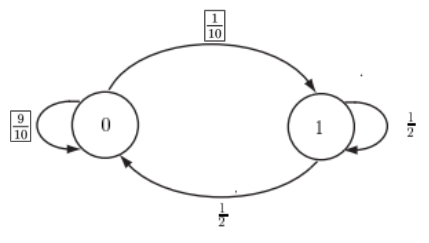

Here we would expect long stretches of $0$s because the high bias of the weighted coin would keep us from flipping the fair coin.

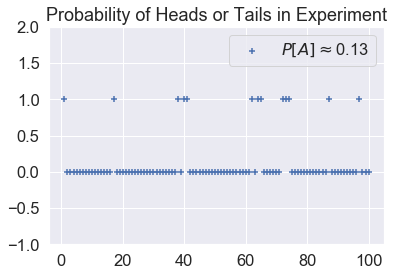

In [33]:
N = 100
x0 = np.random.binomial(1, p=0.5)
seq = [x0]
for i in range(N-1):    
    if seq[i] == 1: # if Heads use fair coin for next toss
        seq.append(np.random.binomial(1, p=0.5))
    else: # if Tails use weighted coin instead
        seq.append(np.random.binomial(1, p=0.1))
prob = sum(seq) / N

plt.scatter(x=range(1,N+1), y=seq, marker='+', label=r'$P[A]\approx$' + f'{prob:.2f}')
plt.title('Probability of Heads or Tails in Experiment')
plt.ylim([-1,2])
plt.legend()
plt.show()

***
### 4.40 😃(f)

For the Markov state diagram in Figure 4.8 with an initial state probability of $P[0] = \frac{3}{4}$, find the probability of the sequence $0,1,1,0$.

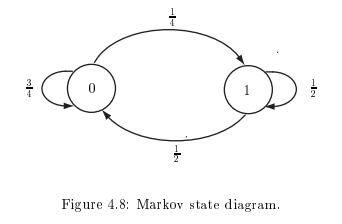

#### Answer:

Since we are automatically given $P[A_1]=P[0]=\frac{3}{4}$ we don't need to bother with the law of total probability to find it and can directly read the conditional probabilities (better known here as the state transition probabilities) off of the Markov state diagram. Using the non-independent subexperiment formula and the Markov property:

$$
\begin{equation}
    \begin{split}
        P[A] &= P[\{ (0,1,1,0) \}] \\
             \\
             &= P[0]\prod_{i=2}^{4}{P[A_i|A_{i-1}]} \\
             \\
             &= P[0]P[1|0]P[1|1]P[0|1] \\
             \\
             &= \big(\frac{3}{4}\big)\big(\frac{1}{4}\big)\big(\frac{1}{2}\big)\big(\frac{1}{2}\big) \\
             \\
             &= \frac{3}{64}
    \end{split}
\end{equation}
$$

***
### 4.41 (f)

A two state Markov chain (see Figure 4.8) has the **state transition probabilities** $P[0|0] = \frac{1}{4}$, $P[0|1] = \frac{3}{4}$, and the initial state probability of $P[0] = \frac{1}{2}$. What is the probability of the sequence $0,1,0,1,0$?

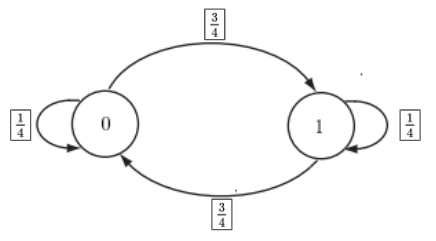

#### Answer:

Since we are automatically given $P[A_1]=P[0]=\frac{1}{2}$ we don't need to bother with the law of total probability to find it and can directly read the conditional probabilities (better known here as the state transition probabilities) off of the Markov state diagram. Using the non-independent subexperiment formula and the Markov property:

$$
\begin{equation}
    \begin{split}
        P[A] &= P[\{ (0,1,0,1,0) \}] \\
             \\
             &= P[0]\prod_{i=2}^{5}{P[A_i|A_{i-1}]} \\
             \\
             &= P[0]P[1|0]P[0|1]P[1|0]P[0|1] \\
             \\
             &= \big(\frac{1}{2}\big)\big(\frac{3}{4}\big)\big(\frac{3}{4}\big)\big(\frac{3}{4}\big)\big(\frac{3}{4}\big) \\
             \\
             &= \frac{81}{512}
    \end{split}
\end{equation}
$$

***
### 4.42 (w)

A digital communication system model is shown in Figure 4.12. In consists of two sections with each one modeling a different portion of the communication channel. What is the probability of a bit error? Compare this to the probability of error for the single section model shown in Figure 4.3, assuming that $\epsilon < \frac{1}{2}$, which is true in practice? Note that Figure 4.12 is a trellis.

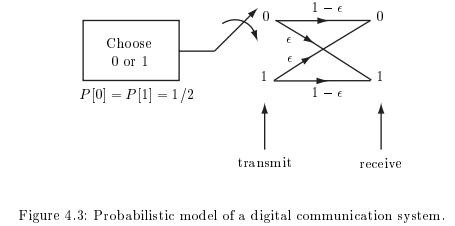
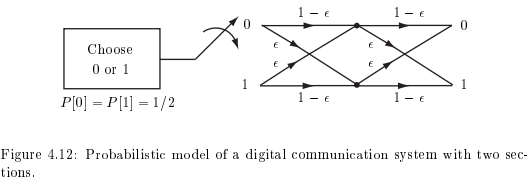

#### Answer:

The error states are receiving a $0$ after sending a $1$ and vice versa. There are 4 possible paths that can be taken to get an error: $\{(0,0,1),(0,1,1),(1,0,0),(1,1,0)\}$. Therefore, the state transition probabilities are

$$
\begin{equation}
    \begin{split}
        P[error] &= P[\{(0,0,1),(0,1,1),(1,0,0),(1,1,0)\}]\\
                 \\
                 &= \sum_{i=0}^{1}P[i]\prod_{j=2}^{3}{P[A_j|A_{j-1}]} \\
                 \\
                 &= P[0]P[0|0]P[1|0] + P[0]P[1|0]P[1|1] + P[1]P[1|1]P[0|1] + P[1]P[0|1]P[0|0] \\
                 \\
                 &= \big(\frac{1}{2}(1 - \epsilon)\epsilon\big) \big(\frac{1}{2}\epsilon(1 - \epsilon)\big) \big(\frac{1}{2}(1 - \epsilon)\epsilon\big) \big(\frac{1}{2}\epsilon(1 - \epsilon)\big)  \\
                 \\
                 &= 2\epsilon(1 - \epsilon).
    \end{split}
\end{equation}
$$

Now we'll need to do some real analysis to compare this to the probability of error, $P[error]=\epsilon$, for the single section model. First, we'll assume $\epsilon\in[0,\frac{1}{2})$. Then, $\epsilon^2 \leq \epsilon$ in this interval which implies $\epsilon^2 \leq \epsilon - \epsilon^2 \leq \epsilon $. Next, we notice that $\epsilon - \epsilon^2 \leq 2\epsilon - 2\epsilon^2$, so we can conclude that $\epsilon \leq 2\epsilon - 2\epsilon^2$.

***
### 4.43 😃(f)

For the trellis shown in Figure 4.9 find the probability of the event $A = \{ (0,1,0,0),(0,0,0,0) \}$.

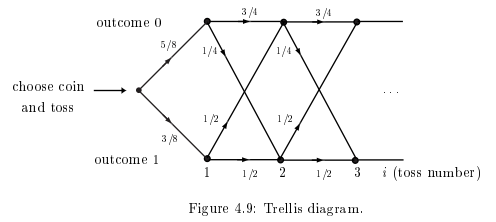

#### Answer:

We can obtain the answer by directly reading off the paths from the trellis diagram:

$$
\begin{equation}
\begin{split}
P[A] &= P[\{ (0,1,0,0),(0,0,0,0) \}] \\
     \\
     &= P[\{ (0,1,0,0)\cup(0,0,0,0) \}] \\
     \\
     &= P[ (0,1,0,0)] + P[(0,0,0,0)] \\
     \\
     &= P[0]\prod_{i=2}^{4}{P[A_i|A_{i-1}]} + P[0]\prod_{i=2}^{4}{P[A_i|A_{i-1}]} \\
     \\
     &= \big(\frac{5}{8}\big)\big(\frac{1}{4}\big)\big(\frac{1}{2}\big)\big(\frac{3}{4}\big) + \big(\frac{5}{8}\big)\big(\frac{3}{4}\big)\big(\frac{3}{4}\big)\big(\frac{3}{4}\big) \\
     \\
     &= \frac{165}{512}
\end{split}
\end{equation}
$$
